# Plots for Investigating Ammonia Masers in W51North

Publication Quality

## D.Deal and C.Henkel ammonia masers comparisons

In [1]:
cd /orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/

/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


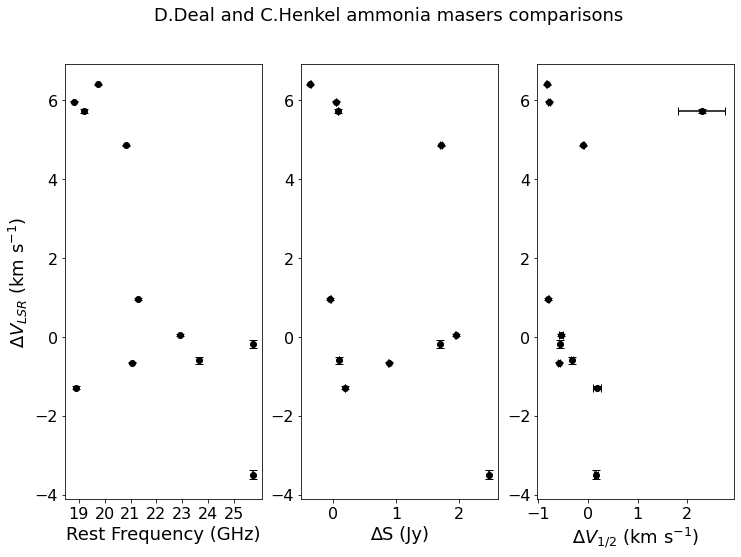

In [2]:
import matplotlib.pyplot as plt
import numpy as np

changeV = [-1.288
,0.960
,6.400
,5.724
,4.852
,5.966
,0.051
,-0.179
,-3.497
,-0.597
,-0.652] #* (u.km)/(u.s)

vrest = [18.88465
,21.28542
,19.75805
,19.21888
,20.80521
,18.80889
,22.92494
,25.71514
,25.71518
,23.65747
,21.07067] #* u.GHz

changeVerror= [0.043
,0.020
,0.010
,0.050
,0.021
,0.021
,0.028
,0.110
,0.112
,0.080
,0.012] #* (u.km)/(u.s)

changeA = [0.186
,-0.044
,-0.361
,0.079
,1.719
,0.047
,1.950
,1.700
,2.480
,0.090
,0.888]

changeAerror = [0.0019
,0.0031
,0.0054
,0.0001
,0.0160
,0.0022
,0.0030
,0.0063
,0.0048
,0.0033
,0.0056]

V12 = [0.18
,-0.80
,-0.83
,2.29
,-0.10
,-0.79
,-0.55
,-0.57
,0.16
,-0.33
,-0.58]

V12error = [0.09
,0.01
,0.01
,0.48
,0.01
,0.02
,0.04
,0.02
,0.05
,0.02
,0.02]

fig = plt.figure(figsize=(12, 8))
plt.suptitle("D.Deal and C.Henkel ammonia masers comparisons", fontname="Times New Roman", fontsize=18)
gs = fig.add_gridspec(3, hspace=2)
gs.subplots(sharex=False, sharey=True)

plt.subplot(1,3,1)

plt.errorbar(vrest, changeV, yerr=changeVerror, fmt="o", capsize=4, color="black")
#plt.title('W51North', fontname="Times New Roman")
plt.xlabel('Rest Frequency (GHz)',fontname="Times New Roman", fontsize=18)
plt.ylabel('$∆V_{LSR}$ (km s$^{-1}$)',fontname="Times New Roman", fontsize=18)
plt.xticks(np.arange(19,26))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.subplot(1,3,2)
plt.errorbar(changeA, changeV, yerr=changeVerror, xerr=changeAerror, fmt="o", capsize=4, color="black")
#plt.title('W51North',fontname="Times New Roman")
plt.xlabel('∆S (Jy)',fontname="Times New Roman", fontsize=18)
#plt.ylabel('∆V_LSR (km s-1)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,3,3)
plt.errorbar(V12, changeV, yerr=changeVerror, xerr=V12error, fmt="o", capsize=4, color="black")
#plt.title('W51North',fontname="Times New Roman")
plt.xlabel('$∆V_{1/2}$ (km s$^{-1}$)',fontname="Times New Roman", fontsize=18)
#plt.ylabel('∆V_LSR (km s-1)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()
fig.savefig('DDeal_CHenkel_maser_comparisons_2',dpi=600)

## Color Coded Maser Velocity Plots

In [3]:
import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization
from spectral_cube import SpectralCube
import warnings
import pandas as pd

In [4]:
fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
fh = SpectralCube.read(fn, format='casa_image')
cen = fh.shape[1]/2, fh.shape[2]/2
fh = fh.to(u.K)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)

/home/dealderod/.local/lib/python3.8/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [5]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

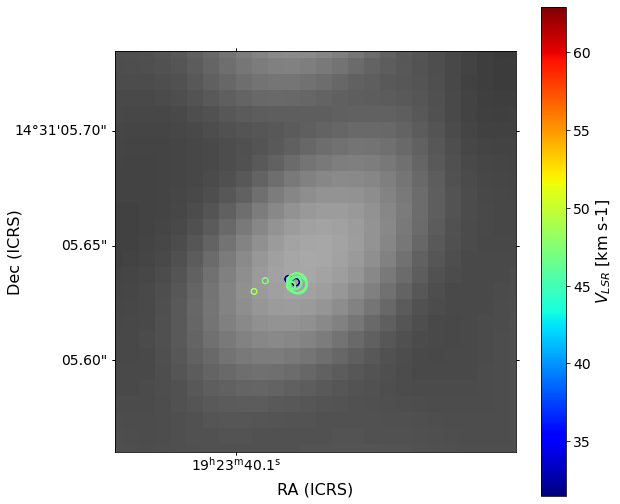

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')

im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=df.S*1000, cmap='jet',marker="$\u25EF$", transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)


ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])

ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->"))

cb.ax.tick_params(labelsize=14)
plt.show()
fig.savefig('Colored_velocity_CA3',dpi=600)

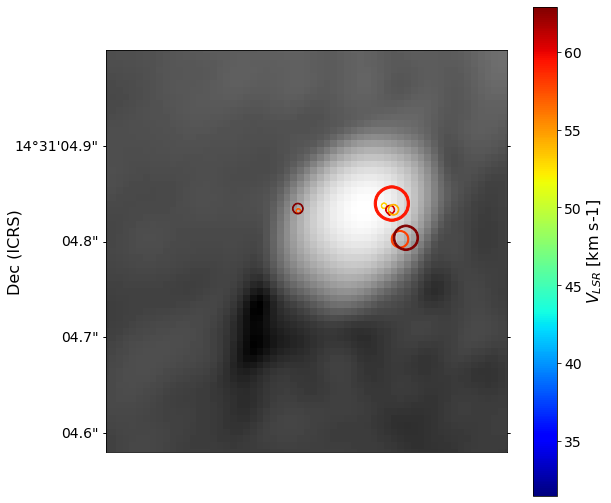

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')

im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=df.S*1000, cmap='jet',marker="$\u25EF$", transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)

ax.axis([cen[0]+340,cen[0]+400,cen[1]-60,cen[1]-0])
ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->"))

cb.ax.tick_params(labelsize=14)
plt.show()
fig.savefig('Colored_velocity_d2',dpi=600)

## W51 Zoom in plots

In [8]:
def w51north_plot():

    fig = pl.figure(figsize=(20,12))
    ax = pl.subplot(projection=ww)
    im = ax.imshow(fh[0].data, cmap='Greys_r', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.99))
    cb = pl.colorbar(mappable=im)
    cb.set_label(f"$T_B$ [{fh[0].header['BUNIT']}]", fontsize = 16)
    #cb.set_ticks([np.nanmin(fh[0].data), -0.005, 0.00 ,0.005, 0.01, 0.015, 0.020, 0.025])
    cb.ax.tick_params(labelsize=14)
    
    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

In [17]:
def maser_points_ax():
    transform = ax.get_transform('world')

    ax.errorbar(290.9158956, 14.51800069, xerr=0.0000007744082441, yerr=0.0000007736500546,marker = '+', elinewidth=1, markersize=15, c='tab:blue', transform=transform, label='(5,3)')
    ax.errorbar(290.9159260, 14.51800888, xerr=0.000001654344601, yerr=0.000001653913398,marker = '+',  markersize=15, color='tab:blue' ,transform=transform)


    ax.errorbar(290.9159003, 14.51801042,  xerr=0.000002231605111, yerr=0.000002351250058,marker = '+',  markersize=15, color='tab:orange', transform=transform,label='(6,2)')


    ax.errorbar(290.9158939, 14.51800111,  xerr=0.0000007096939545, yerr=0.0000007087442309,marker = '+' , markersize=15, color='tab:green', transform=transform, label='(6,3)')
    ax.errorbar(290.9159262, 14.51800959,  xerr=0.0000009249558173, yerr=0.000001004686655, marker = '+', markersize=15, color='tab:green', transform=transform)

    ax.errorbar(290.9158986, 14.51800816,  xerr=0.000001508011353, yerr=0.00000150789928, marker = '+', markersize=15, color='tab:red', transform=transform,label='(7,4)')

    ax.errorbar(290.9158982, 14.51801105,  xerr=0.0000007282855144, yerr=0.000000725438108, marker = '+', markersize=15, color='tab:purple', transform=transform,label='(7,5)')

    ax.errorbar(290.9170759, 14.518231700,  xerr=0.0000009592657155, yerr=0.0000009525078288,marker = '+',  markersize=15, color='tab:cyan', transform=transform,label='(7,6)')
    ax.errorbar(290.9170768, 14.51823206,  xerr=0.000001154934128, yerr=0.000001147556912, marker = '+', markersize=15, color='tab:cyan', transform=transform)
    ax.errorbar(290.9170765, 14.518231240,  xerr=0.000000935432323, yerr=0.0000009270761778, marker = '+', markersize=15, color='tab:cyan', transform=transform)

    ax.errorbar(290.9170797, 14.51823187,  xerr=0.000002502666799, yerr=0.000002502605651,marker = '+',  markersize=15, color='tab:pink', transform=transform,label='(7,7)')
    ax.errorbar(290.9170811, 14.51823057,  xerr=0.000003297782113, yerr=0.000003297622733,marker = '+',  markersize=15, color='tab:pink', transform=transform)
    ax.errorbar(290.9170758, 14.51823158,  xerr=0.0000004803880607, yerr=0.0000004803625509,marker = '+',  markersize=15, color='tab:pink', transform=transform)
    ax.errorbar(290.9170760, 14.5182316,  xerr=0.0000007257750809, yerr=0.0000007257355513, marker = '+', markersize=15, color='tab:pink', transform=transform)

    ax.errorbar(290.9158985, 14.51800926,  xerr=0.0000007257750809, yerr=0.000001031573272,marker = '+',  markersize=15, color='tab:gray', transform=transform,label='(8,5)')

    ax.errorbar(290.9158975, 14.51800925,  xerr=0.000001251703102, yerr=0.000001251358726,marker = '+',  markersize=15, color='tab:brown', transform=transform,label='(9,8)')


    ax.errorbar(290.9170756, 14.51823135,  xerr=0.0000007157208018, yerr=0.0000007151353273,marker = '+',  markersize=15, color='tab:olive', transform=transform,label='(11,9)')
    ax.errorbar(290.916824, 14.51822272,  xerr=0.000001822484554, yerr=0.000001343610514,marker = '+',  markersize=15, color='tab:olive', transform=transform)
    ax.errorbar(290.9169891, 14.51815923,  xerr=0.000003270723414, yerr=0.000003270495024,marker = '+',  markersize=15, color='tab:olive', transform=transform)

    ax.legend(title='NH3 (J,K)', fontsize = 16)
    
    return

In [18]:
def maser_points_axins():
    transform = axins.get_transform('world')

    axins.errorbar(290.9158956, 14.51800069, xerr=0.0000007744082441, yerr=0.0000007736500546, elinewidth=1, markersize=15, c='tab:blue', transform=transform, label='(5,3)')
    axins.errorbar(290.9159260, 14.51800888, xerr=0.000001654344601, yerr=0.000001653913398,  markersize=15, color='tab:blue' ,transform=transform)


    axins.errorbar(290.9159003, 14.51801042,  xerr=0.000002231605111, yerr=0.000002351250058,  markersize=15, color='tab:orange', transform=transform,label='(6,2)')


    axins.errorbar(290.9158939, 14.51800111,  xerr=0.0000007096939545, yerr=0.0000007087442309,  markersize=15, color='tab:green', transform=transform, label='(6,3)')
    axins.errorbar(290.9159262, 14.51800959,  xerr=0.0000009249558173, yerr=0.000001004686655,  markersize=15, color='tab:green', transform=transform)

    axins.errorbar(290.9158986, 14.51800816,  xerr=0.000001508011353, yerr=0.00000150789928,  markersize=15, color='tab:red', transform=transform,label='(7,4)')

    axins.errorbar(290.9158982, 14.51801105,  xerr=0.0000007282855144, yerr=0.000000725438108,  markersize=15, color='tab:purple', transform=transform,label='(7,5)')

    axins.errorbar(290.9170759, 14.518231700,  xerr=0.0000009592657155, yerr=0.0000009525078288,  markersize=15, color='tab:cyan', transform=transform,label='(7,6)')
    axins.errorbar(290.9170768, 14.51823206,  xerr=0.000001154934128, yerr=0.000001147556912,  markersize=15, color='tab:cyan', transform=transform)
    axins.errorbar(290.9170765, 14.518231240,  xerr=0.000000935432323, yerr=0.0000009270761778,  markersize=15, color='tab:cyan', transform=transform)

    axins.errorbar(290.9170797, 14.51823187,  xerr=0.000002502666799, yerr=0.000002502605651,  markersize=15, color='tab:pink', transform=transform,label='(7,7)')
    axins.errorbar(290.9170811, 14.51823057,  xerr=0.000003297782113, yerr=0.000003297622733,  markersize=15, color='tab:pink', transform=transform)
    axins.errorbar(290.9170758, 14.51823158,  xerr=0.0000004803880607, yerr=0.0000004803625509,  markersize=15, color='tab:pink', transform=transform)
    axins.errorbar(290.9170760, 14.5182316,  xerr=0.0000007257750809, yerr=0.0000007257355513,  markersize=15, color='tab:pink', transform=transform)

    axins.errorbar(290.9158985, 14.51800926,  xerr=0.0000007257750809, yerr=0.000001031573272,  markersize=15, color='tab:gray', transform=transform,label='(8,5)')

    axins.errorbar(290.9158975, 14.51800925,  xerr=0.000001251703102, yerr=0.000001251358726,  markersize=15, color='tab:brown', transform=transform,label='(9,8)')


    axins.errorbar(290.9170756, 14.51823135,  xerr=0.0000007157208018, yerr=0.0000007151353273,  markersize=15, color='tab:olive', transform=transform,label='(11,9)')
    axins.errorbar(290.916824, 14.51822272,  xerr=0.000001822484554, yerr=0.000001343610514,  markersize=15, color='tab:olive', transform=transform)
    axins.errorbar(290.9169891, 14.51815923,  xerr=0.000003270723414, yerr=0.000003270495024,  markersize=15, color='tab:olive', transform=transform)
    
    return

In [19]:
def maser_points_axins2():

    transform = axins2.get_transform('world')
    

    axins2.errorbar(290.9158956, 14.51800069, xerr=0.0000007744082441, yerr=0.0000007736500546, elinewidth=1, markersize=15, c='tab:blue', transform=transform, label='(5,3)')
    
    axins2.errorbar(290.9159260, 14.51800888, xerr=0.000001654344601, yerr=0.000001653913398,  markersize=15, color='tab:blue' ,transform=transform)


    axins2.errorbar(290.9159003, 14.51801042,  xerr=0.000002231605111, yerr=0.000002351250058,  markersize=15, color='tab:orange', transform=transform,label='(6,2)')


    axins2.errorbar(290.9158939, 14.51800111,  xerr=0.0000007096939545, yerr=0.0000007087442309,  markersize=15, color='tab:green', transform=transform, label='(6,3)')
    axins2.errorbar(290.9159262, 14.51800959,  xerr=0.0000009249558173, yerr=0.000001004686655,  markersize=15, color='tab:green', transform=transform)

    axins2.errorbar(290.9158986, 14.51800816,  xerr=0.000001508011353, yerr=0.00000150789928,  markersize=15, color='tab:red', transform=transform,label='(7,4)')
   
    axins2.errorbar(290.9158982, 14.51801105,  xerr=0.0000007282855144, yerr=0.000000725438108,  markersize=15, color='tab:purple', transform=transform,label='(7,5)')

    axins2.errorbar(290.9170759, 14.518231700,  xerr=0.0000009592657155, yerr=0.0000009525078288,  markersize=15, color='tab:cyan', transform=transform,label='(7,6)')
    axins2.errorbar(290.9170768, 14.51823206,  xerr=0.000001154934128, yerr=0.000001147556912,  markersize=15, color='tab:cyan', transform=transform)
    axins2.errorbar(290.9170765, 14.518231240,  xerr=0.000000935432323, yerr=0.0000009270761778,  markersize=15, color='tab:cyan', transform=transform)

    axins2.errorbar(290.9170797, 14.51823187,  xerr=0.000002502666799, yerr=0.000002502605651,  markersize=15, color='tab:pink', transform=transform,label='(7,7)')
    axins2.errorbar(290.9170811, 14.51823057,  xerr=0.000003297782113, yerr=0.000003297622733,  markersize=15, color='tab:pink', transform=transform)
    axins2.errorbar(290.9170758, 14.51823158,  xerr=0.0000004803880607, yerr=0.0000004803625509,  markersize=15, color='tab:pink', transform=transform)
    axins2.errorbar(290.9170760, 14.5182316,  xerr=0.0000007257750809, yerr=0.0000007257355513,  markersize=15, color='tab:pink', transform=transform)

    axins2.errorbar(290.9158985, 14.51800926,  xerr=0.0000007257750809, yerr=0.000001031573272,  markersize=15, color='tab:gray', transform=transform,label='(8,5)')

    axins2.errorbar(290.9158975, 14.51800925,  xerr=0.000001251703102, yerr=0.000001251358726,  markersize=15, color='tab:brown', transform=transform,label='(9,8)')


    axins2.errorbar(290.9170756, 14.51823135,  xerr=0.0000007157208018, yerr=0.0000007151353273,  markersize=15, color='tab:olive', transform=transform,label='(11,9)')
    axins2.errorbar(290.916824, 14.51822272,  xerr=0.000001822484554, yerr=0.000001343610514,  markersize=15, color='tab:olive', transform=transform)
    axins2.errorbar(290.9169891, 14.51815923,  xerr=0.000003270723414, yerr=0.000003270495024,  markersize=15, color='tab:olive', transform=transform)

    return

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [13]:
img = fh[0].data

<Figure size 3600x2400 with 0 Axes>

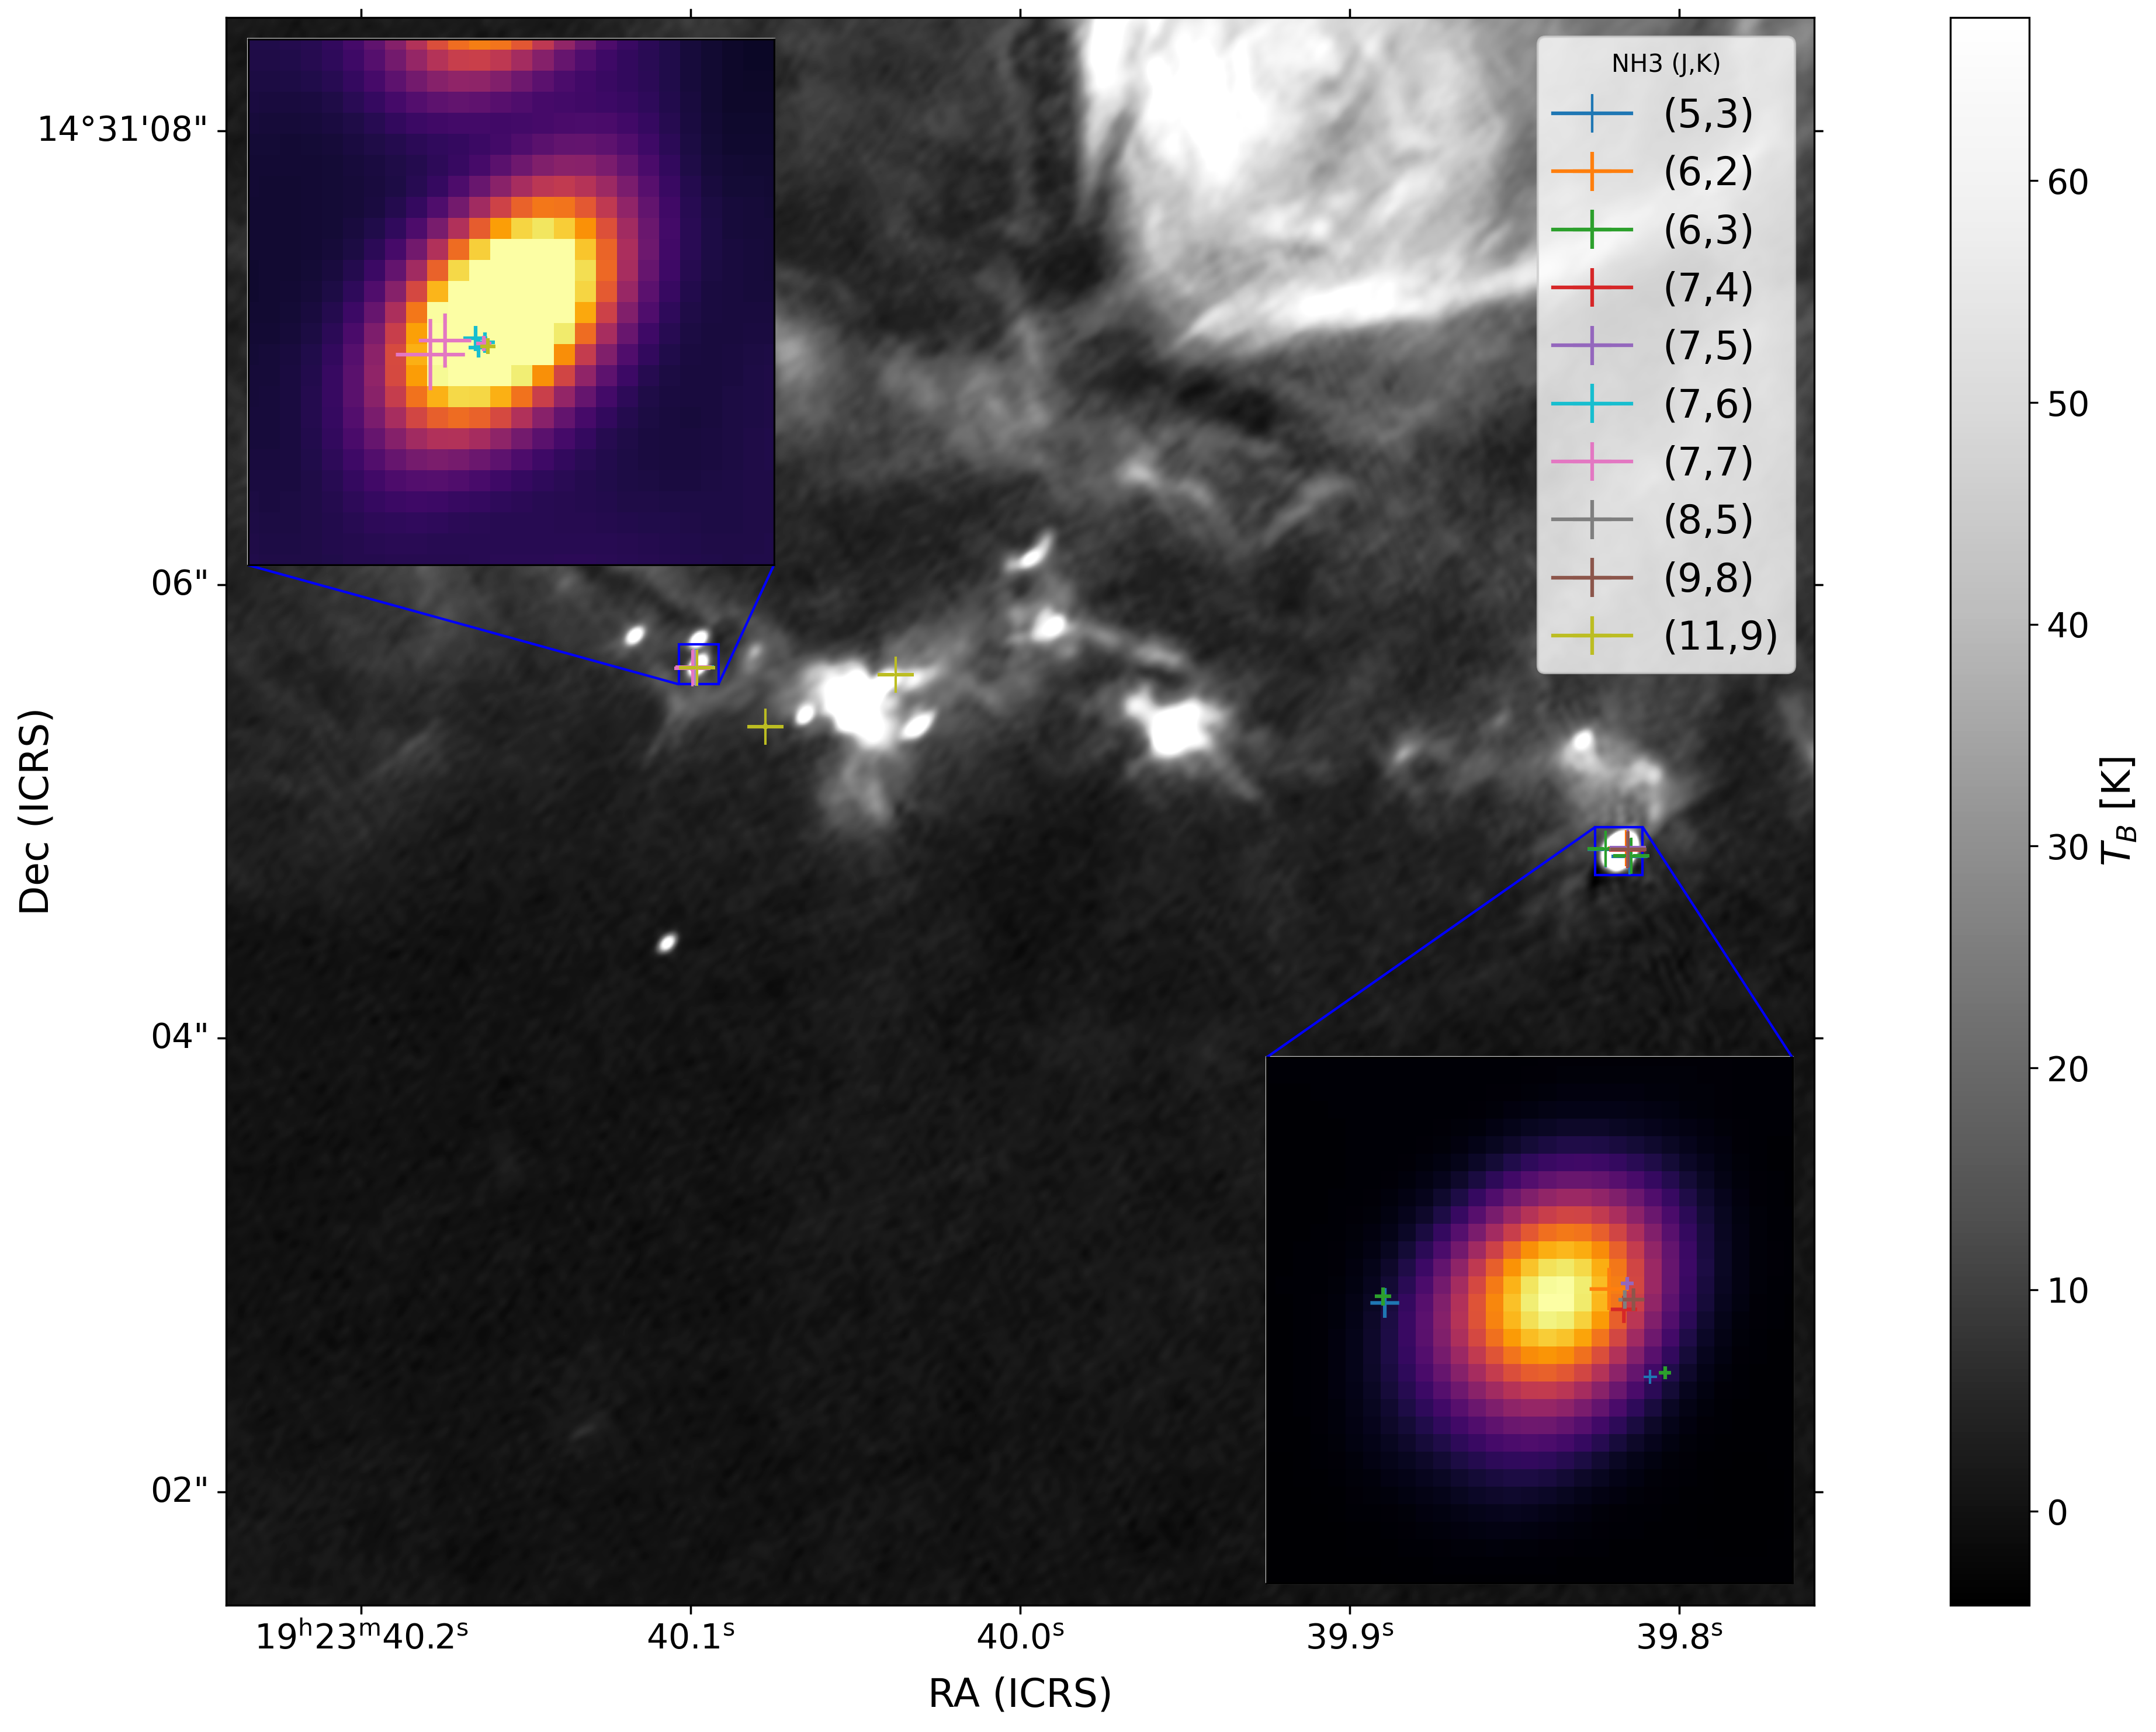

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = pl.figure(figsize=(12,8))
ax = w51north_plot()

maser_points_ax()


axins = inset_axes(ax,
                   loc=2, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                   axes_kwargs=dict(wcs=ww))
axins.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])

mark_inset(parent_axes=ax, inset_axes=axins,
                   fc="none", ec="b", loc1=3, loc2=4)
maser_points_axins()
axins.imshow(img, cmap='inferno', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.999))


axins2 = inset_axes(ax,
                   loc=4, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                   axes_kwargs=dict(wcs=ww))
# axins2.axis([cen[0]-50,cen[0]-0,cen[1]+350,cen[1]+400])
axins2.axis([cen[0]+362,cen[0]+392,cen[1]-40,cen[1]-10])
mark_inset(parent_axes=ax, inset_axes=axins2,
                   fc="none", ec="b", loc1=1, loc2=2)
maser_points_axins2()
axins2.imshow(img, cmap='inferno')
# divider = make_axes_locatable(axins)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# pl.colorbar(ax2cb, cax)
ax.annotate('(7,4)', (290.9158986, 14.51800816), xytext=(290.9158986, 14.51800816), arrowprops = dict(arrowstyle="->"))

ra = axins2.coords['ra']
dec = axins2.coords['dec']

axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)
ra.set_ticks_visible(False)
dec.set_ticks_visible(False)
ra.set_axislabel('')
dec.set_axislabel('')
ra.ticklabels.set_visible(False)
dec.ticklabels.set_visible(False)


ra = axins.coords['ra']
dec = axins.coords['dec']

axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)
ra.set_ticks_visible(False)
dec.set_ticks_visible(False)
ra.set_axislabel('')
dec.set_axislabel('')
ra.ticklabels.set_visible(False)
dec.ticklabels.set_visible(False)

pl.show()
pl.rcParams['figure.dpi'] = 600
pl.rcParams['savefig.dpi'] = 600
#fig.savefig('Overview_W51IRS2_6',dpi=500)

<Figure size 864x864 with 0 Axes>

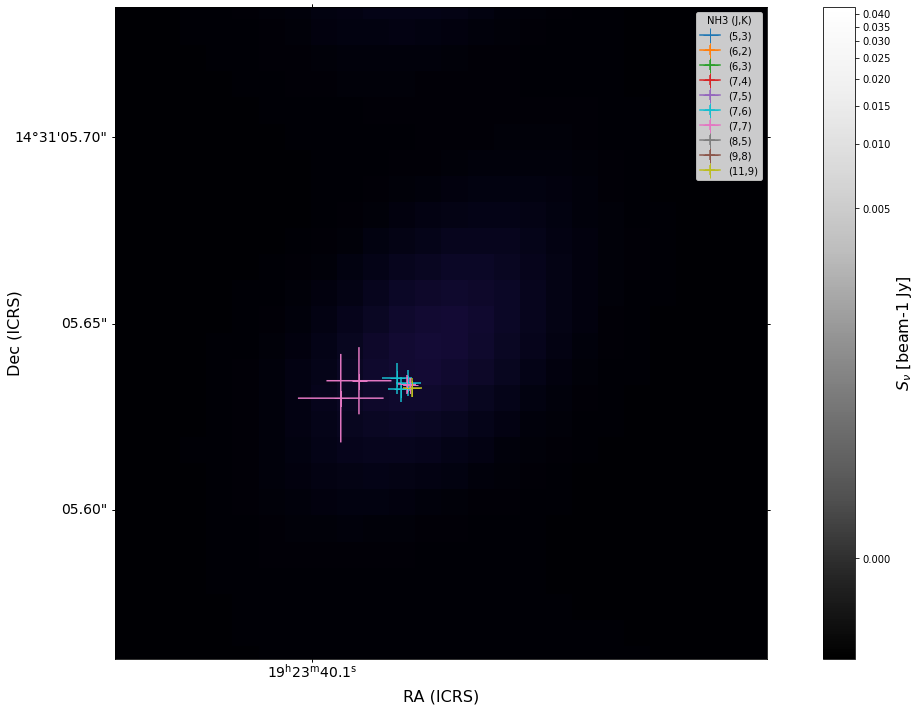

In [14]:
fig = pl.figure(figsize=(12,12))
ax = w51north_plot()

maser_points_ax()

ax.imshow(img, cmap='inferno')
ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->"))
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])

pl.show()

In [15]:
fn2 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51_North_KabandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal2.image.tt0.pbcor.fits'
fh2 = SpectralCube.read(fn2, format='fits')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww2 = WCS(fh2[0].header)

cen2 = fh2.shape[1]/2, fh2.shape[2]/2

In [16]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

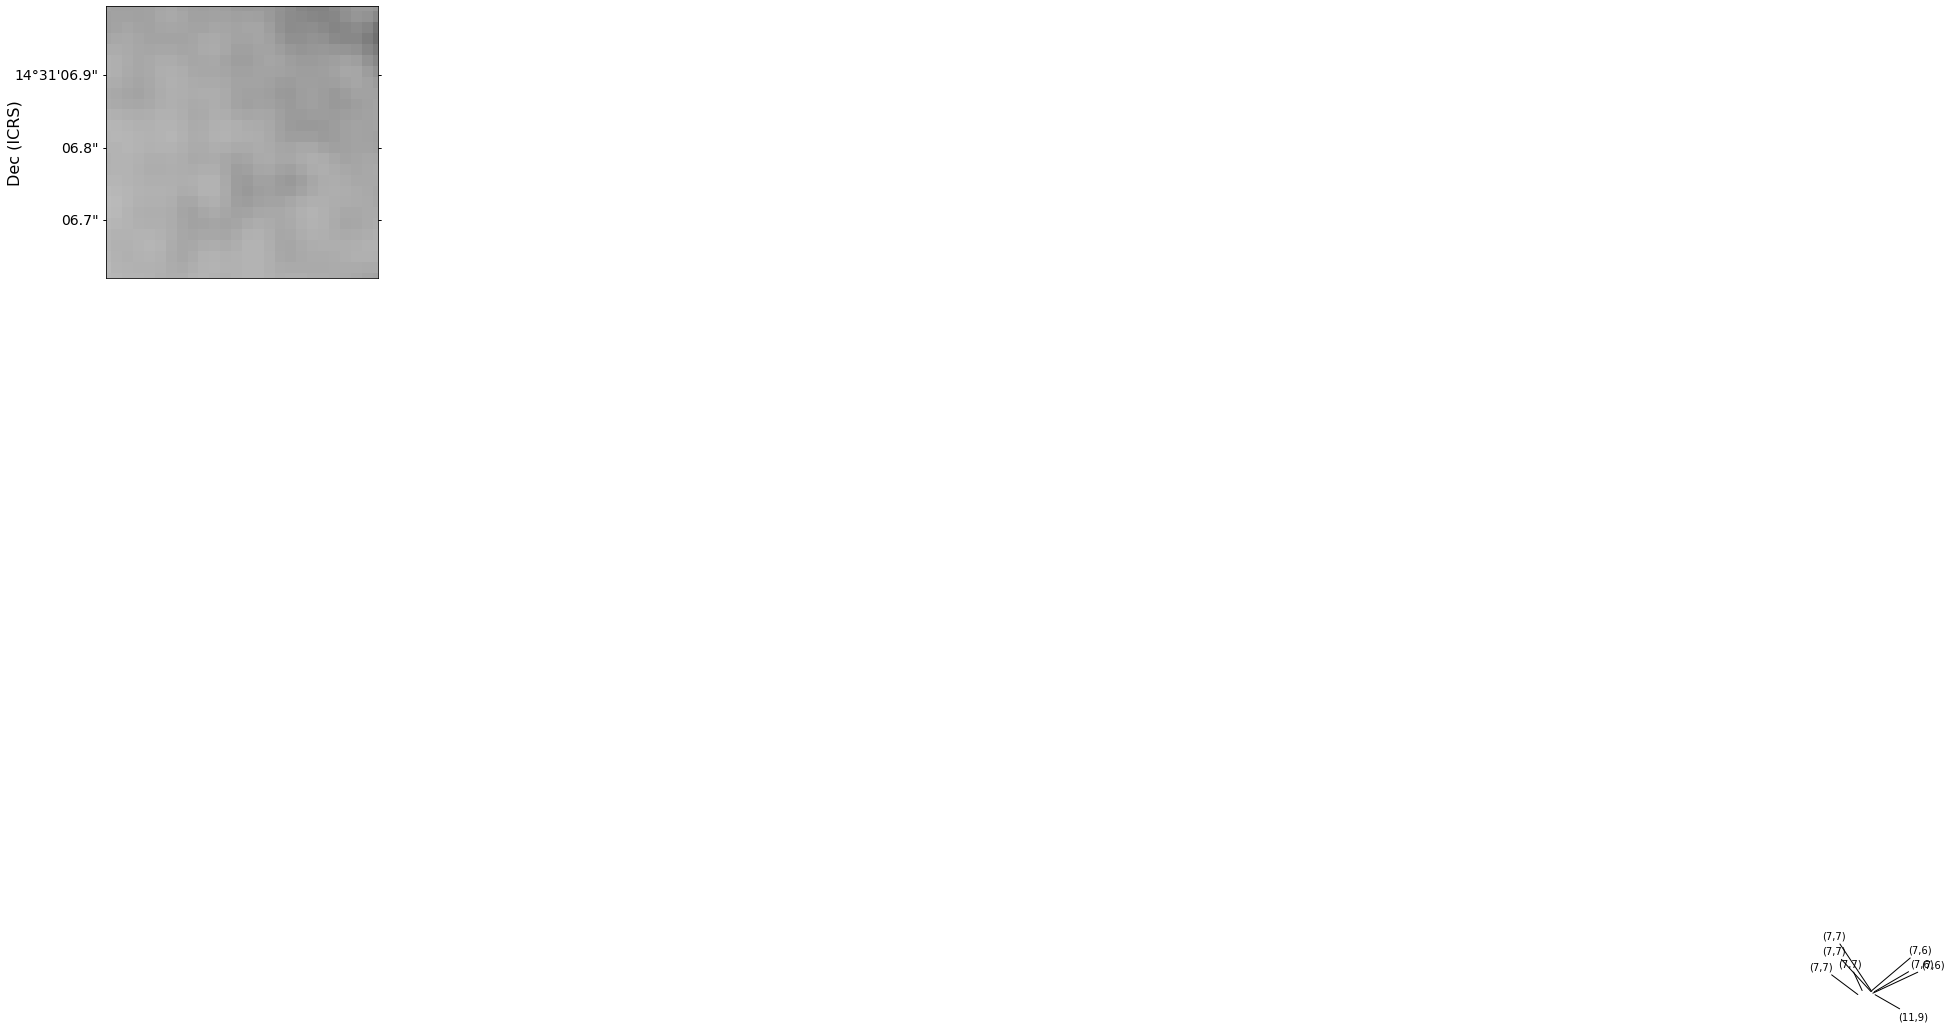

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5,5))

ax = pl.subplot(projection=ww2)

#df = pd.read_csv('/Users/galagabits/Desktop/ammonia-3.csv')

w51north_settings()
# ax.annotate('(7,6)', (290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->", transform=ww))
ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759-0.000015, 14.518231700+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,6)', (290.9170768, 14.51823206), xytext=(290.9170768-0.000015, 14.51823206+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,6)', (290.9170765, 14.518231240), xytext=(290.9170765-0.00002, 14.518231240+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

ax.annotate('(7,7)', (290.9170797, 14.51823187), xytext=(290.9170797+0.00001, 14.51823187+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170811, 14.51823057), xytext=(290.9170811+0.00002, 14.51823057+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170758, 14.51823158), xytext=(290.9170758+.00002, 14.51823158+0.000021), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))
ax.annotate('(7,7)', (290.9170760, 14.5182316), xytext=(290.9170760+0.00002, 14.5182316+0.000015), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

ax.annotate('(11,9)', (290.9170756, 14.51823135), xytext=(290.9170756-0.00001, 14.51823135-0.00001),
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'))

im = ax.imshow(fh2[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=99.95))
#sc = ax.scatter(df.dec, df.ra, marker="o", transform=ax.get_transform('world'), color='black', alpha=0.6)
#cs = ax.contour(fh[0].data, levels=np.logspace(-3, 1, 20), alpha=0.8)
cs = ax.contour(fh2[0].data, levels=np.logspace(-3, 1, 20), alpha=0.8)


# cb = plt.colorbar(mappable=im)
# cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)


ax.axis([cen2[1]-215,cen2[1]-190,cen2[0]+80,cen2[0]+105])
#ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
#ax.text()
#ax.annotate('(7,6)', (290.9170759, 14.518231700), xytext=(290.9170759, 14.518231700), arrowprops = dict(arrowstyle="->"))

# cb.ax.tick_params(labelsize=14)
plt.show()

## position-velocity plot of SPW 56 $NH_3$ (6,3)

Text(1, 1, 'NH3')

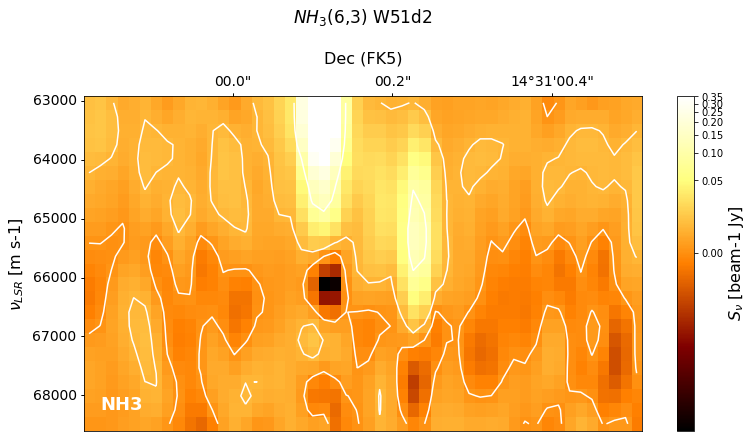

In [18]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_56_corrected2.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(616., 360.), (630., 358.), (632., 358.), (632., 357.), (633., 356.), (634., 356.), (637., 357.), (638., 356.)])

pv = extract_pv_slice(fh, path1)

fig = pl.figure(figsize=(10,5))
ax = pl.subplot(projection=ww, slices =(50, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data.transpose(), cmap='afmhot', norm=visualization.simple_norm(pv.data, stretch='log', max_percent=99.1), aspect = 'auto')

cs = ax.contour(pv.data.transpose(), levels=np.logspace(-3, 1, 5), colors='white', alpha=1)
#ax.clabel(cs, inline=False, fontsize=11)

cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
# vrad.set_ticks([np.nanmin(fh[0].data), 63500]*u.m/u.s, ["t","t"])
# ax.set_yticklabels(["t","t"])
pl.tight_layout()
ax.set_title('$NH_3$(6,3) W51d2', y=1.2, fontsize=17)
ax.text(s='NH3', y=1, x=1, color='white', fontsize=18, weight='bold')

In [ ]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_56_corrected2.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(616., 360.), (630., 358.), (632., 358.), (632., 357.), (633., 356.), (634., 356.), (637., 357.), (638., 356.)])

pv = extract_pv_slice(fh, path1)

fig = pl.figure(figsize=(10,5))
ax = pl.subplot(projection=ww, slices =(50, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data.transpose(), cmap='grays', norm=visualization.simple_norm(pv.data, stretch='log', max_percent=99.1), aspect = 'auto')

cs = ax.contour(pv.data.transpose(), levels=np.logspace(-3, 1, 5), colors='white', alpha=1)
#ax.clabel(cs, inline=False, fontsize=11)

cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
# vrad.set_ticks([np.nanmin(fh[0].data), 63500]*u.m/u.s, ["t","t"])
# ax.set_yticklabels(["t","t"])
pl.tight_layout()
ax.set_title('$NH_3$(6,3) W51d2', y=1.2, fontsize=17)
ax.text(s='NH3', y=1, x=1, color='white', fontsize=18, weight='bold')



## SED of CA3

In [39]:
import pandas as pd
import matplotlib.pylab as plt

<AxesSubplot:title={'center':'CA3 SED PBCOR'}, xlabel='Frequency (GHz)', ylabel='Flux (mJy/beam)'>

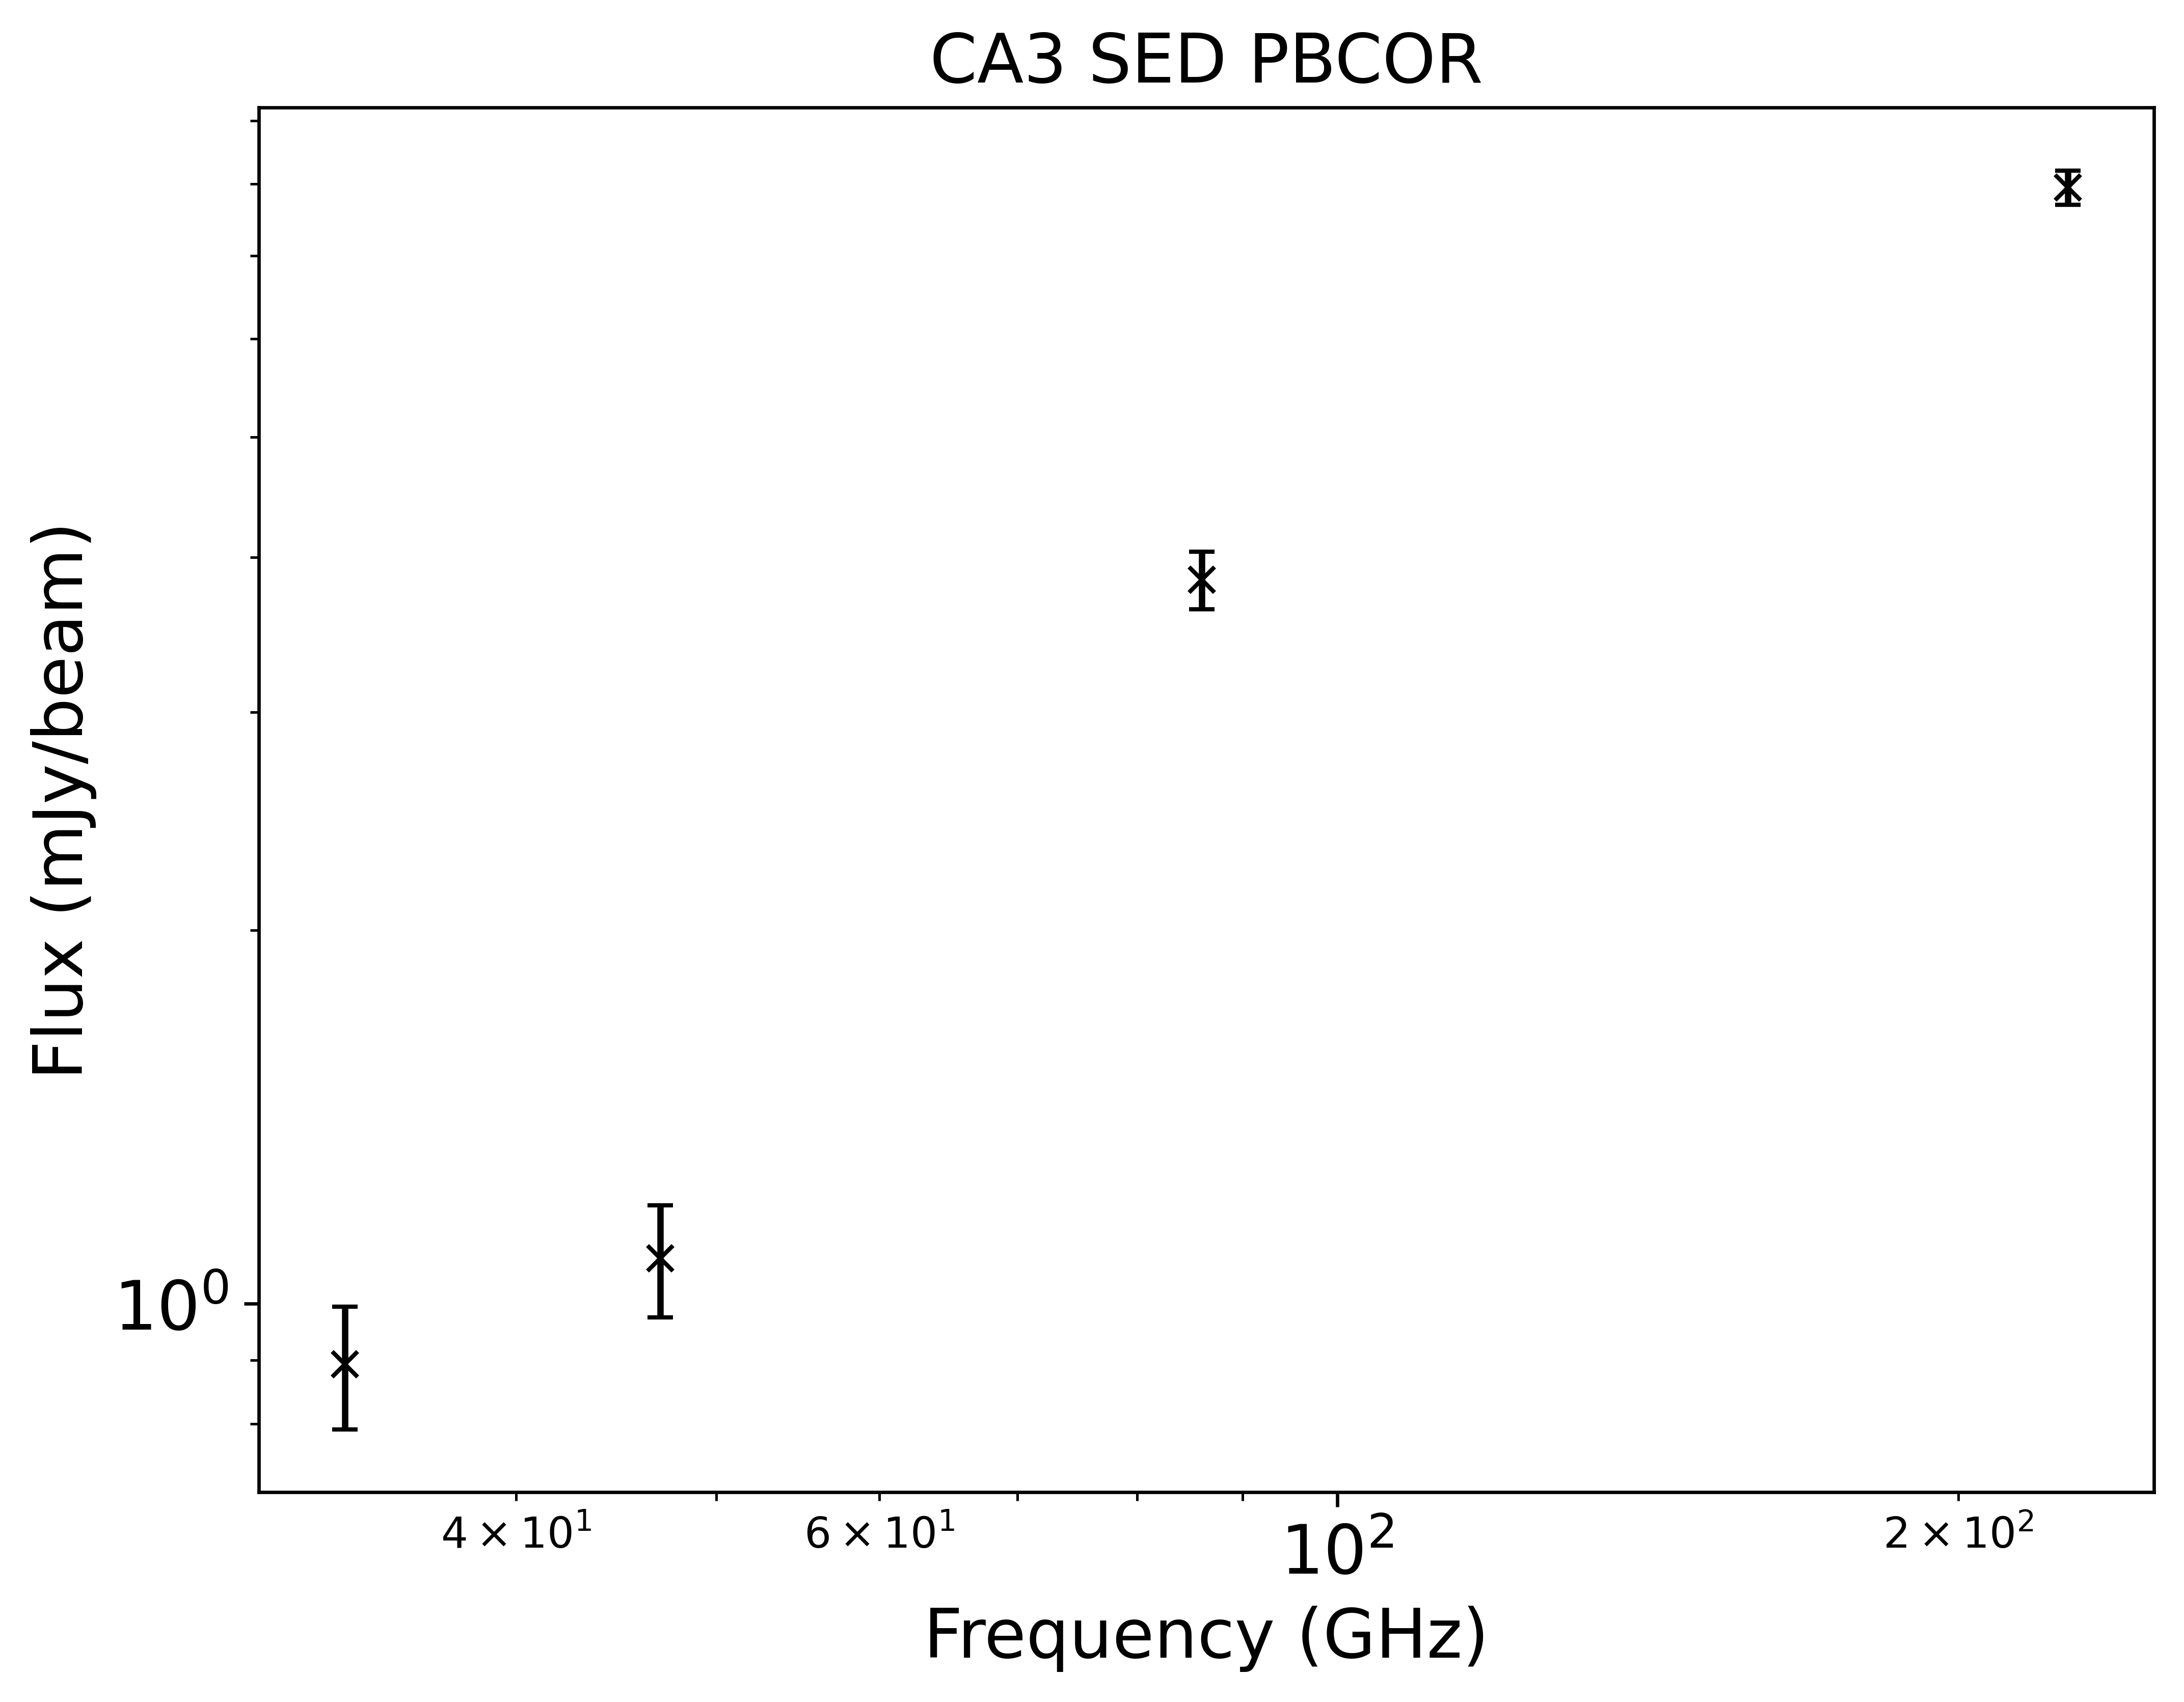

In [44]:
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/W51CA3_Fitting/hiiregion_W51_CA3_pbcor_03.csv')  

def SED_plot():
    fontsize = 16
    fig, ax = plt.subplots(figsize=(8,6))
    plt.title("CA3 SED PBCOR", fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel("Frequency (GHz)", fontsize=fontsize)
    ax.set_ylabel("Flux (mJy/beam)", fontsize=fontsize)
    ax.errorbar(df.mu_GHz, df.amp_mJy, yerr=df.amp_error_mJy, fmt='x', color="black", capsize=3)
    ax.loglog()
    return ax

SED_plot()

In [45]:
import numpy as np
from scipy.constants import c

In [46]:
c1 = 0.0446511627906
c2 = 0.00054421768707
c3 = 6.478781989e-6
c4 = 7.712835701e-8
mu1 = np.linspace(30,250,100)
amp1 = c1*(mu1**1)
amp2 = c2*(mu1**2)
amp3 = c3*(mu1**3)
amp4 = c4*(mu1**4)

### ax = SED_plot()
plt.loglog(mu1, amp1, label='$f =c\\nu$')
plt.loglog(mu1, amp2, label='$f =c\\nu^2$', linestyle = '--')
plt.loglog(mu1, amp3, label='$f =c\\nu^3$', linestyle = '--')
plt.loglog(mu1, amp4, label='$f =c\\nu^4$', linestyle = '--')
plt.loglog()

plt.legend()

In [48]:
%matplotlib inline
import pylab as pl
from astropy import units as u
from astropy import constants
import radio_beam
import pylab as pl
from dust_emissivity import dust
import numpy as np
#from constants import frequency as cfreq, distance


from astropy.visualization import quantity_support
quantity_support()  
pl.matplotlib.style.use('default')

cfreq = 100*u.GHz
distance = 8.1*u.kpc

def dens(Qlyc=1e45*u.s**-1, R=0.1*u.pc, alpha_b=2e-13*u.cm**3*u.s**-1):
    return (((3 * Qlyc)/(4 * np.pi * R**3 * alpha_b))**0.5).to(u.cm**-3)

def EMfunc(Qlyc=1e45*u.s**-1, R=0.1*u.pc, alpha_b=2e-13*u.cm**3*u.s**-1):
    return (R * (((3 * Qlyc)/(4 * np.pi * R**3 * alpha_b))**0.5)**2).to(u.cm**-6*u.pc)

def tau(nu, EM, Te=7000*u.K):
    # eq 4.60 of https://www.cv.nrao.edu/~sransom/web/Ch4.html
    return 3.28e-7 * (Te/(1e4*u.K))**-1.35 * (nu/u.GHz)**-2.1 * (EM/(u.cm**-6*u.pc))

def Tb(Te=7000*u.K, nu=cfreq, EM=EMfunc()):
    return Te * (1-np.exp(-tau(nu=nu, EM=EM, Te=Te)))
    #return (8.235e-2 * (Te/(u.K))**-0.35 * (nu/u.GHz)**-2.1 * (EM/u.cm**-6/u.pc)*u.K).to(u.K)

def Tb_beamdiluted(Te=7000*u.K, nu=cfreq, R=0.1*u.pc, Qlyc=1e45*u.s**-1, beam=4000*u.au):
    tb = Tb(Te=Te, nu=nu, EM=EMfunc(R=R, Qlyc=Qlyc))
    if beam < R:
        return tb
    else:
        return (tb * (R/beam)**2).to(u.K)

def Snu_freefree(Te=7000*u.K, nu=cfreq, EM=None, R=0.1*u.pc, Qlyc=1e45*u.s**-1, beam=4000*u.au,
                 angular_beam=0.5*u.arcsec, distance=5.1*u.kpc):
    beam = R
    angular_beam = (beam/distance).to(u.arcsec, u.dimensionless_angles())
    
    if EM is None:
        tb = Tb(Te=Te, nu=nu, EM=EMfunc(R=R, Qlyc=Qlyc))
    else:
        tb = Tb(Te=Te, nu=nu, EM=EM)
        
    angular_beam = radio_beam.Beam(angular_beam) if angular_beam.unit.is_equivalent(u.arcsec) else angular_beam.to(u.sr)
        
    if beam < R:
        return tb.to(u.mJy, u.brightness_temperature(frequency=nu, beam_area=angular_beam))
    else:
        return (tb * (R/beam)**2).to(u.mJy, u.brightness_temperature(frequency=nu, beam_area=angular_beam))

def gff(nu, Te=1e4*u.K, Zi=1):
    """
    Draine eqn 10.7
    """
    valid_check =  (Zi * (nu/u.GHz) / (Te/(1e4*u.K))**1.5)
    if np.any(valid_check < 0.14):
        raise ValueError("Invalid approximation")
    elif np.any(valid_check > 250):
        # eqn 10.9
        return np.log(np.exp(5.960-3**0.5/np.pi*np.log(Zi*(nu/u.GHz)*(Te/(1e4*u.K))**-1.5)) + np.exp(1))
    return 6.155 * (Zi * (nu/u.GHz))**-0.118 * (Te/(1e4*u.K))**0.177
    
def freefree_draine_coeff(nu, Te=1e4*u.K, Zi=1):
    """
    Draine eqn 10.1, 10.2
    """
    const = 8/3 * (2*np.pi/3)**0.5 * constants.e.esu**6/constants.m_e**2/constants.c**3 * (constants.m_e/(constants.k_B*Te))**0.5
    unit = u.erg/u.s/u.Hz*u.cm**3
    assert np.abs(const.to(unit) - 5.444e-41*unit) < 0.001e-41*unit
    gaunt = gff(nu=nu, Te=Te)
    boltz = np.exp(-constants.h*nu / (constants.k_B*Te))
    temfac = (Te/(1e4*u.K))**-0.5
    # this is multiplied by density squared
    return const.to(unit) * boltz * temfac * u.sr**-1 * Zi**2 * gaunt

assert np.abs(freefree_draine_coeff(1*u.GHz) - 3.35e-40*u.erg*u.cm**3/u.s/u.Hz/u.sr).value < 0.01e-40

def freefree_draine(nu, EM, Te=1e4*u.K):
    coef = freefree_draine_coeff(nu=nu, Te=Te)
    assert coef.unit.is_equivalent(u.cm**3*u.erg/u.Hz/u.s/u.sr)
    return (coef*EM).to(u.erg/u.s/u.cm**2/u.Hz/u.sr)
    
def snu_dust(density=1e4*u.cm**-3, Td=40*u.K, radius=4000*u.au, distance=distance, cfreq=cfreq):
    mass = (density * 2.8 * u.Da * 4/3. * radius**3).to(u.M_sun)
    print(mass)
    beam = radio_beam.Beam((radius/distance).to(u.arcsec,u.dimensionless_angles()))
    flux = dust.snuofmass(nu=cfreq, mass=mass, beamomega=beam, temperature=Td, distance=distance)
    return flux

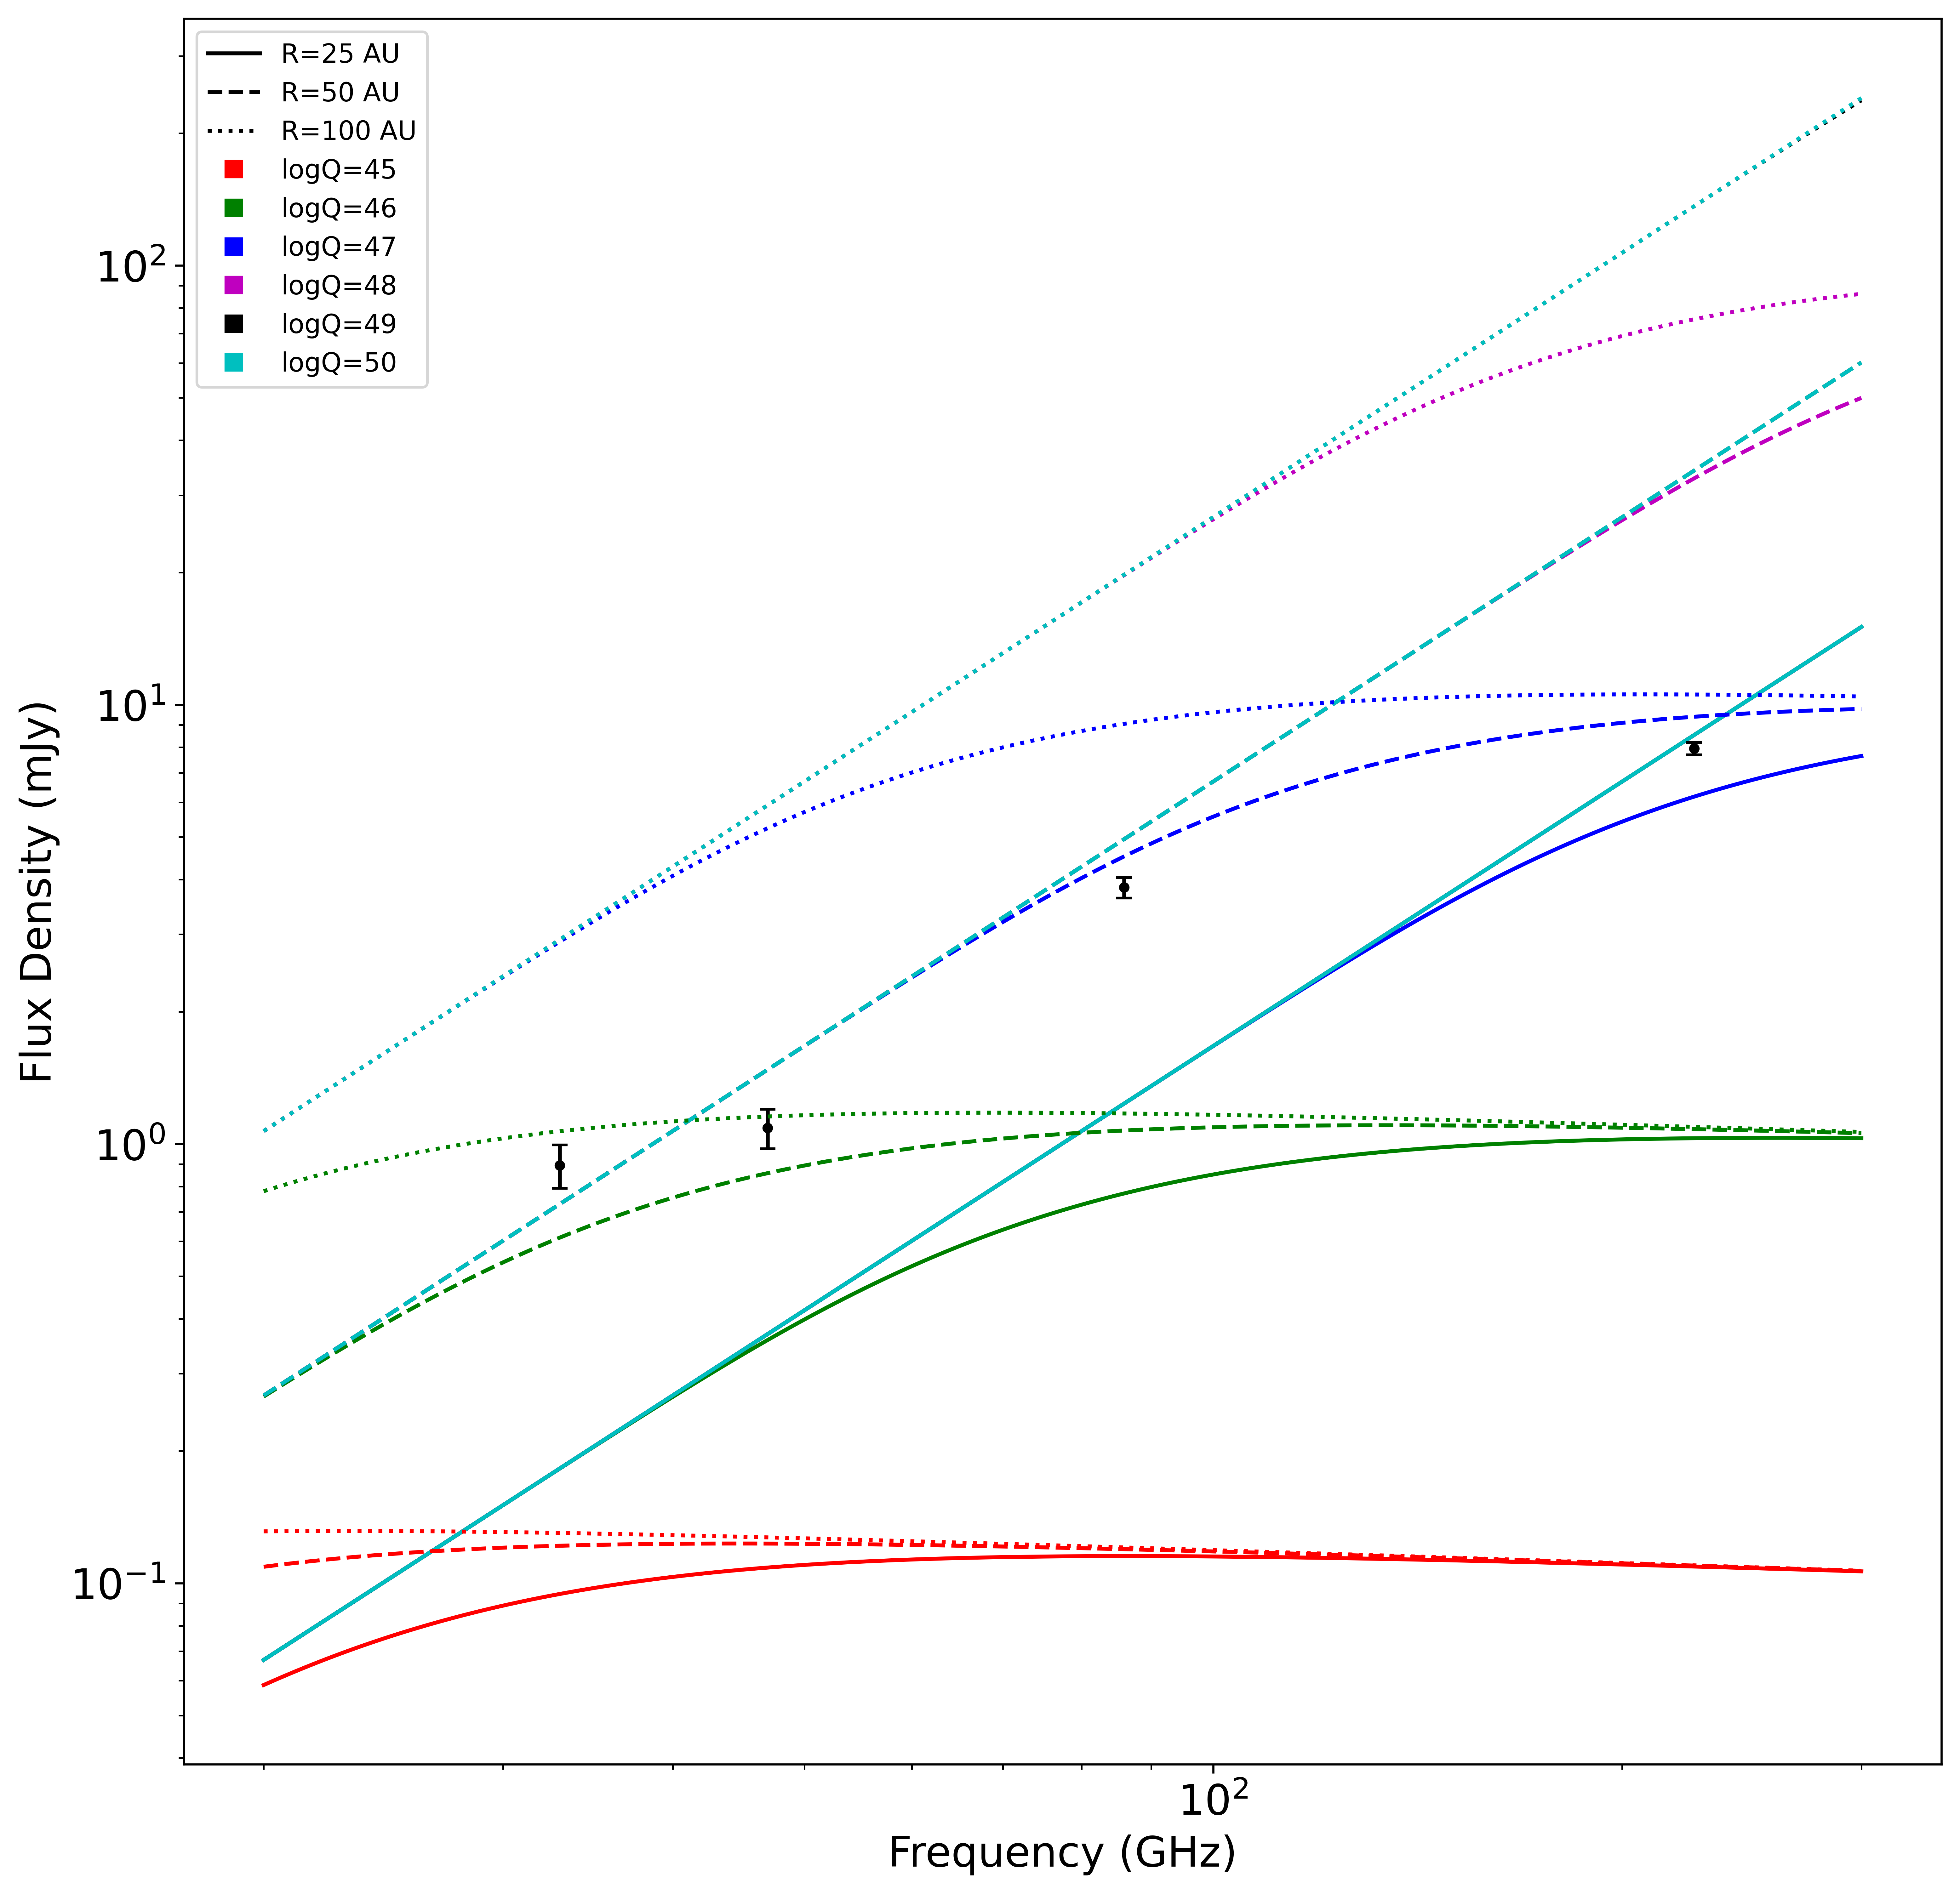

In [56]:
freqs = np.linspace(20,300,1000)*u.GHz


pl.figure(1, figsize=(12,12)).clf()
colors = [x for x in 'rgbmkc']

pl.gca().set_prop_cycle(color=colors)

#pl.figure(2, figsize=(12,12)).clf()
#pl.figure(3, figsize=(12,12)).clf()

radius = 10*u.au
qlycs = np.logspace(45,50,6)*u.s**-1
for radius, linestyle in zip((25,50,100,)*u.au, ('-','--',':','-.')):

    seds_K = [Tb(Te=7000*u.K, nu=freqs, EM=EMfunc(R=radius, Qlyc=qlyc),)
              for qlyc in qlycs]

    seds = [Snu_freefree(Te=8500*u.K, nu=freqs, R=radius, Qlyc=qlyc, beam=0.05*u.au,
            angular_beam=0.05*u.arcsec,)
            for qlyc in qlycs]
    taus = [tau(freqs, EMfunc(Qlyc=qlyc, R=radius))
            for qlyc in qlycs]
    labels = ["R={0} Q={1}".format(radius, qlyc) for qlyc in qlycs]

    pl.figure(1)
    lines = pl.loglog(freqs, np.transpose(seds), linestyle=linestyle, label=labels, )
#     pl.figure(2)
#     x = pl.loglog(freqs, np.transpose(taus), linestyle=linestyle, label=labels, )
#     pl.figure(3)
#     x = pl.loglog(freqs, np.transpose(seds_K), linestyle=linestyle, label=labels, )
pl.figure(1)
pl.tick_params(axis='both', which='major', labelsize=16)
pl.xlabel("Frequency (GHz)", fontsize=16)
pl.ylabel("Flux (mJy/beam)", fontsize=16)

pl.errorbar(df.mu_GHz, df.amp_mJy, yerr=df.amp_error_mJy, fmt='.', color="black", capsize=3)
pl.xlabel("Frequency (GHz)")
pl.ylabel("Flux Density (mJy)")
pl.legend((pl.Line2D([0],[0],linestyle='-', color='k'),
           pl.Line2D([0],[0],linestyle='--', color='k'),
           pl.Line2D([0],[0],linestyle=':', color='k'),)
          + tuple(pl.Line2D([0],[0],marker='s',linestyle='none', color=colors[ii])
                  for ii in range(len(qlycs)))
          ,
          ('R=25 AU','R=50 AU','R=100 AU',) + tuple("logQ={0}".format(int(np.log10(qlyc.value))) for qlyc in qlycs)
          ,
         )
pl.rcParams['figure.dpi'] = 600
pl.rcParams['savefig.dpi'] = 600
pl.show()

## Spectral and Spatial Plots for W51North

- https://github.com/GalagaBits/W51-Masers-and-Starforming-Regions/tree/main/gaussianplots
- https://github.com/GalagaBits/W51-Masers-and-Starforming-Regions/tree/main/gaussianplots/Gaussian2D_plots